In [59]:
import numpy as np
import pandas as pd
import subprocess
import os

base_dir = "/run/user/1000/gvfs/sftp:host=godzilla/home/maths/phrnaj/AABIsavefiles/"
files = os.listdir(base_dir)
    
def pd_to_np(dd):
    return np.asarray([np.mean(di) for di in dd.values])
    
def aggregate_pandas(pd_list):
    
    # Pad the smaller dataframes with nans upto the largest one
    nrows = [pd_i.shape[0] for pd_i in pd_list]
    maxrow = np.max(nrows)
    ncols = pd_list[0].shape[1]
    colnames = pd_list[0].columns
    se_factor = 1/np.sqrt(len(pd_list))
    
    # for loops over dataframes, concatenating nans
    for i, pd_i in enumerate(pd_list):
        padrows = maxrow - pd_i.shape[0]
        print(nrows)
        if padrows>0:
            pad = np.nan * np.ones((padrows, ncols))
            pad = pd.DataFrame(pad, columns=colnames)
            pd_i = pd.concat([pd_i, pad])
            pd_list[i] = pd_i
            
#         print(pd_list[i].shape)    

        
    
    mean_pd = pd.DataFrame()
    
    for col in colnames:
        
        if col in  ['Test ELBO','Test Reconstruction','Test Prior KL']:
            data = [pd_i[col] for pd_i in pd_list]
            data = np.vstack([pd_to_np(di) for di in data]).T
            
        else:
            data = np.vstack([pd_i[col] for pd_i in pd_list]).T.astype(float)
        
        print("\t", col, data.shape)
        
        
        means = np.nanmean(data, 1)
        sds   = np.nanstd(data, 1)*se_factor
        
        mean_pd[col+'_mean'] = means
        mean_pd[col+'_sd'] = sds
        
    print(mean_pd.shape)
    return mean_pd
        
        
# res_dict = {NP:betavalsdict, SIN:betavalsdict}
res_dict = {}
for elbo in ["SIN", "NP"]:
                          
    # beta_dict = {1:av_of_runs, ..., 100:av_of_runs}
    beta_dict = {}
    for beta in ["1.0", "20.0", "50.0", "100.0"]:
        
        
        eb_files = [f for f in files if elbo in f and beta in f]
        
        eb_dfs = [pd.read_pickle(base_dir+eb_f) for eb_f in eb_files]
        
        print(elbo +" " +beta+": "+str(len(eb_dfs)) + " files.")
        
        av_df = aggregate_pandas(eb_dfs)
                          
        beta_dict[beta] = av_df
    
    res_dict[elbo] = beta_dict

        
        


SIN 1.0: 8 files.
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
[491, 491, 1, 491, 11, 491, 491, 491]
	 Step (491, 8)
	 Loss (491, 8)
	 Test ELBO (491, 8)
	 Test Reconstruction (491, 8)
	 Test Prior KL (491, 8)
	 Train ELBO (491, 8)
	 Train Reconstruction (491, 8)
	 Train Prior KL (491, 8)
	 min qs_var (491, 8)
	 max qs_var (491, 8)
	 min q_var (491, 8)
	 max q_var (491, 8)
	 MSE (491, 8)
	 Beta (491, 8)
	 Time (491, 8)
(491, 30)
SIN 20.0: 9 files.
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]
[1, 11, 491, 1, 491, 491, 491, 491, 491]

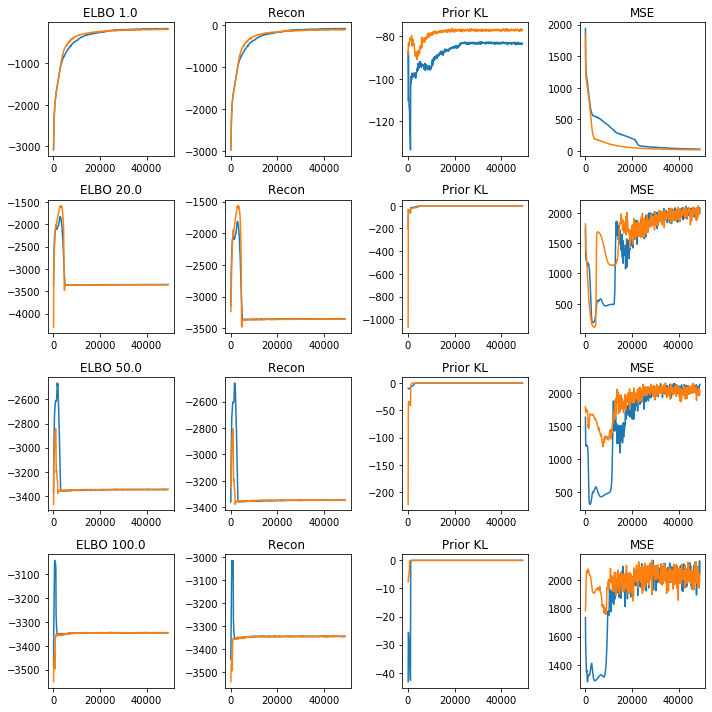

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(10,10))

cols = ['blue', 'red']

for elbo, col in zip(['SIN', 'NP'], cols):
    
    for axi, beta in zip(ax, ["1.0", "20.0", "50.0", "100.0"]):
    
        
        steps = res_dict[elbo][beta]['Step_mean'].values
        elbo_i = res_dict[elbo][beta]['Test ELBO_mean'].values
        rec = res_dict[elbo][beta]['Test Reconstruction_mean'].values
        pkl = res_dict[elbo][beta]['Test Prior KL_mean'].values
        mse = res_dict[elbo][beta]['MSE_mean'].values
        
        
        axi[0].plot(steps, elbo_i, col)
        axi[0].title.set_text('ELBO '+beta)
        
        axi[1].plot(steps, rec)
        axi[1].title.set_text('Recon ')
        
        axi[2].plot(steps, pkl)
        axi[2].title.set_text('Prior KL')
        
        axi[3].plot(steps, mse)
        axi[3].title.set_text('MSE')
        
fig.tight_layout()
        

In [71]:
matplotlib.rcParams.keys()

/home/michael/anaconda3/envs/TF/lib/python3.6/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [162]:
import matplotlib
matplotlib.rcParams['font.size'] = 14

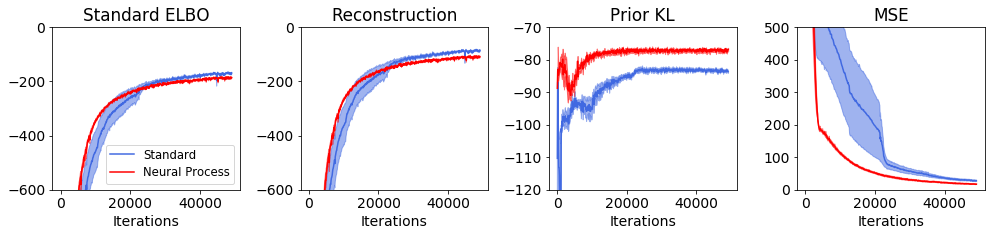

In [172]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(14,3.5))

ax = [ax] 
cols = ['royalblue', 'red']

for elbo, col in zip(['SIN', 'NP'], cols):
    
    for axi, beta in zip(ax, ["1.0", "20.0", "50.0", "100.0"]):
    
        
        steps = res_dict[elbo][beta]['Step_mean'].values
        elbo_i = res_dict[elbo][beta]['Test ELBO_mean'].values
        elbo_isd = res_dict[elbo][beta]['Test ELBO_sd'].values
        
        rec = res_dict[elbo][beta]['Test Reconstruction_mean'].values
        rec_sd = res_dict[elbo][beta]['Test Reconstruction_sd'].values
        
        pkl = res_dict[elbo][beta]['Test Prior KL_mean'].values
        pkl_sd = res_dict[elbo][beta]['Test Prior KL_sd'].values
        
        mse = res_dict[elbo][beta]['MSE_mean'].values
        mse_sd = res_dict[elbo][beta]['MSE_sd'].values
        
        alpha = 0.5
        
        axi[0].plot(steps, elbo_i, color=col)
        axi[0].fill_between(steps, elbo_i+elbo_isd, elbo_i-elbo_isd, alpha=alpha, color=col)
        axi[0].set_title('Standard ELBO')
        axi[0].set_ylim([-600,0])
        axi[0].legend(["Standard", "Neural Process"], fontsize='small', frameon=True, loc='lower right')
        axi[0].set_xlabel("Iterations")

        
        
        axi[1].plot(steps, rec, color=col)
        axi[1].fill_between(steps, rec+rec_sd, rec-rec_sd, alpha=alpha, color=col)
        axi[1].set_title('Reconstruction')
        axi[1].set_ylim([-600,0])
#         axi[1].legend(["Standard Objective", "Neural Process Objective"], loc='lower center', ncol=2, bbox_to_anchor=(1.1, -0.5))
        axi[1].set_xlabel("Iterations")

        
        axi[2].plot(steps, pkl, color=col)
        axi[2].fill_between(steps, pkl+pkl_sd, pkl-pkl_sd, alpha=alpha, color=col)
        axi[2].set_title('Prior KL')
        axi[2].set_ylim([-120,-70])
#         axi[2].legend(["Standard", "Neural Process"])
        axi[2].set_xlabel("Iterations")

        
        axi[3].plot(steps, mse, color=col)
        axi[3].fill_between(steps, mse+mse_sd, mse-mse_sd, alpha=alpha, color=col)
        axi[3].set_title('MSE')
        axi[3].set_ylim([0, 500])
#         axi[3].legend(["Standard", "Neural Process"])

        axi[3].set_xlabel("Iterations")

        
# fig.legend(["Standard", "Neural Process"], loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)        
fig.tight_layout()
        

In [173]:
fig.savefig("/home/michael/AABI_plots/AABI_elbo-1.pdf")

In [131]:
matplotlib.rcParams.keys()

/home/michael/anaconda3/envs/TF/lib/python3.6/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        